# Personality Prediction

# About the dataset

 The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in


import numpy as np   #linear algebra   
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns   #for visualization of the data
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import TfidfVectorizer      #for feature scaling
from sklearn.model_selection import train_test_split   #to split train and test data set
from sklearn.linear_model import LogisticRegression     #algorithm to the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the dataset

In [2]:
data=pd.read_csv("C:/Users/gokul/OneDrive/Desktop/machine learning/projects/mbti_1.csv")

In [3]:
data.head()   # displays top 5 rows of the dataset

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# Data Cleaning

In [4]:
data.shape     #display no of rows and columns

(8675, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 8675 entries, 0 to 8674

Data columns (total 2 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   type    8675 non-null   object

 1   posts   8675 non-null   object

dtypes: object(2)

memory usage: 135.7+ KB


## Check for null values

In [6]:
data.isnull().any()

type     False
posts    False
dtype: bool

In [7]:
data['type'].unique()   #displays unique values in type column

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

<AxesSubplot:ylabel='type'>

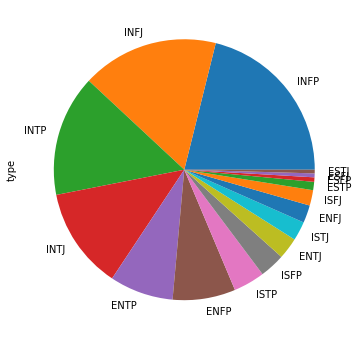

In [8]:
plt.figure(figsize=(8,6))
data.type.value_counts().plot(kind='pie')   #pie chart - used for easy understanding of no of counts in each values in type column

# Spliting of columns

In [9]:
x=data['posts']
y=data['type']    

In [10]:
x

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

# Feature scaling

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv= TfidfVectorizer(min_df=1,stop_words='english',lowercase= True)
x=tfv.fit_transform(x)

In [12]:
x

<8675x145099 sparse matrix of type '<class 'numpy.float64'>'
	with 3413291 stored elements in Compressed Sparse Row format>

In [13]:
y

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object

### Split dataset into train and test data

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [15]:
X_train.shape

(6940, 145099)

In [16]:
X_test.shape

(1735, 145099)

# Model using algorithm

###Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=model.predict(X_test)

In [19]:
model.score(X_test,y_test)

0.6236311239193083

# random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion="entropy")
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [21]:
y_pred1=model.predict(X_test)

In [22]:
model.score(X_test,y_test)

0.23515850144092218

# Decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [24]:
y_pred2=model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.47031700288184436